In [1]:
#!/usr/bin/env pyhton3
# -*- coding 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Multi hidden layer

In [4]:
# Global variables
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
N_SAMPLE = 1000
TEST_SIZE = 0.2
ALPHA = 0.1 # learning rate
NOISE = 0.2 # Error
EPOCHS = 50000

In [5]:
inpDir = './input'
outDir = './output'

In [6]:
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,4),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


## Load Data
Sklearn make_moons

In [8]:
X,y = datasets.make_moons(
        n_samples = N_SAMPLE,
        noise = NOISE,
        shuffle  = True,
        random_state = RANDOM_STATE
)
X.shape, y.shape

((1000, 2), (1000,))

EDA 
1: plot data

<Axes: xlabel='A', ylabel='B'>

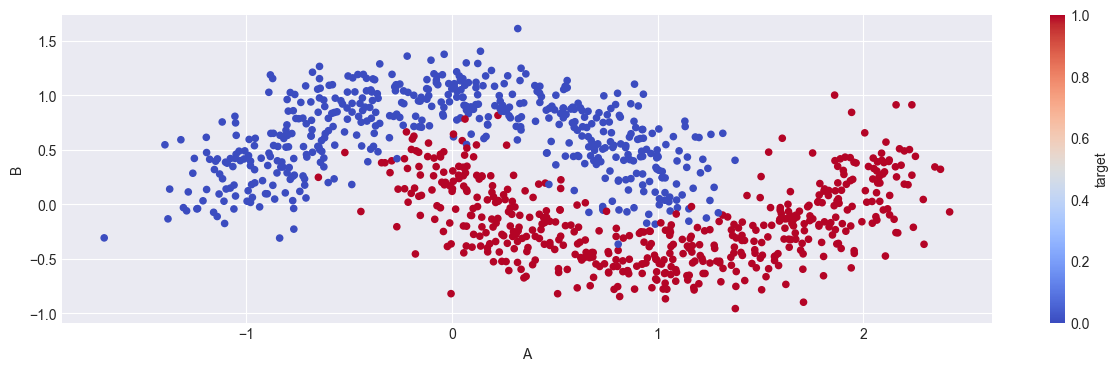

In [10]:

data_df = pd.DataFrame(X, columns = ('A','B'))
data_df['target'] = y
data_df.head()

data_df.plot.scatter('A','B',c= 'target', cmap=CMAP)

In [11]:
matplotlib.__version__

'3.9.2'

In [12]:
y = pd.get_dummies(y).to_numpy()
type(y)

numpy.ndarray

In [13]:
rng = np.random.default_rng(seed=RANDOM_STATE)
def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(data_train.shape[1]) # randomly generated weights
    m= train.shape[0] # number of samples
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1] # a-y
            sum_error +=  - row[-1] * np.log(prediction) # sum of squared error
            weights[0] +=  - alpha * dz / m # calculating and adjusting weights by alpha multiplication and  divide with whole row no. to get error for whole set
            for i in range(len(row) - 1):
                weights[i+1] += -alpha * row[i] * dz / m
        errors.append(sum_error / m)
    return errors, weights

## Softmax Activation Function

In [15]:
def softmax(z):
    exp_scores = np.exp(z - np.max(z))
    return exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)


In [16]:
def predict(model, X_p):
    W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
    b1,b2,b3,b4,b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']
    # Layer1 
    z1 = X_p.dot(W1) + b1 # Aggregation function
    a1 = fn_actv(z1) ## Activation function
    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation function
    a2 = fn_actv(z2) ## Activation function
    #Layer 3
    z3 = a2.dot(W3) + b3 # Aggregation function
    a3 = fn_actv(z3) ## Activation function
     #Layer 4
    z4 = a3.dot(W4) + b4 # Aggregation function
    a4 = fn_actv(z4) ## Activation function
    
     #Layer 5
    z5 = a4.dot(W5) + b5 # Aggregation function
    a5 = softmax(z5) ## Activation function

    return a5.argmax(axis=1)


In [17]:
def fn_calculate_loss(model, X_l, y_l):
    W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
    b1,b2,b3,b4,b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']

    m = X_l.shape[0]
    
    # Layer1 
    z1 = X_l.dot(W1) + b1 # Aggregation function
    a1 = fn_actv(z1) ## Activation function
    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation function
    a2 = fn_actv(z2) ## Activation function
    #Layer 3
    z3 = a2.dot(W3) + b3 # Aggregation function
    a3 = fn_actv(z3) ## Activation function
     #Layer 4
    z4 = a3.dot(W4) + b4 # Aggregation function
    a4 = fn_actv(z4) ## Activation function
    
     #Layer 5
    z5 = a4.dot(W5) + b5 # Aggregation function
    a5 = softmax(z5) ## Activation function
    data_loss = -(y_l * np.log(a5) + (1 - y_l)*np.log(1-a5)).sum()
    return data_loss / m

In [18]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(z): # Differentiation of Tanh()
    return 1 - (np.tanh(z))**2

In [19]:
fn_actv(np.array([[-1,0,1],[-np.inf,0,np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [20]:
# def predict():
#     z = 1
#     return sigmoid(z) # stepwise Activation Function
        

In [21]:
def fn_loss_calculate_loss():
    pass

## Split DATA in Test Train

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [24]:
def build_model(param, X_t, y_t, n_epochs= EPOCHS, alpha = ALPHA):
    '''
    5-5-4-3
    '''
    # get dimensions for weights init
    m = X_t.shape[0]
    
    # initialize weights
    W1 = rng.random((param[0], param[1]), dtype = np.float32) / np.sqrt(param[0])
    W2 = rng.random((param[1], param[2]), dtype = np.float32)/np.sqrt(param[1])
    W3 = rng.random((param[2], param[3]), dtype = np.float32)/np.sqrt(param[2]) 
    W4 = rng.random((param[3], param[4]), dtype = np.float32)/np.sqrt(param[3])
    W5 = rng.random((param[4], param[5]), dtype = np.float32)/np.sqrt(param[4])
    
    # initialize bias
    b1 = np.zeros((1,param[1]), dtype = np.float32)
    b2 = np.zeros((1,param[2]), dtype = np.float32)
    b3 = np.zeros((1,param[3]), dtype = np.float32)
    b4 = np.zeros((1,param[4]), dtype = np.float32)
    b5 = np.zeros((1,param[5]), dtype = np.float32)

    # print(W1.shape, W2.shape, W3.shape, W4.shape, W5.shape)
    # print(b1.shape, b2.shape, b3.shape, b4.shape, b5.shape)
    
    curr_loss = 0
    loss = []
    # loss_hist = {}
    epoch = []
    for i in range(n_epochs):
        ### Forwards propagation
        # Layer1 
        z1 = X_t.dot(W1) + b1 # Aggregation function
        a1 = fn_actv(z1) ## Activation function
        # Layer 2
        z2 = a1.dot(W2) + b2 # Aggregation function
        a2 = fn_actv(z2) ## Activation function
    #Layer 3
        z3 = a2.dot(W3) + b3 # Aggregation function
        a3 = fn_actv(z3) ## Activation function
         #Layer 4
        z4 = a3.dot(W4) + b4 # Aggregation function
        a4 = fn_actv(z4) ## Activation function

         #Layer 5
        z5 = a4.dot(W5) + b5 # Aggregation function
        a5 = softmax(z5) ## Activation function

    # # Layer2
    #     z2 = a1.dot(W2) + b2 # Aggregation function
    #     a2 = sigmoid(z2)# Activation function

        ### Back Propagation
        ## Layer 5
        dz5 = a5 - y_t # y should be of shape (1,m)
        
        dW5 = (a4.T).dot(dz5)
        assert(W5.shape == dW5.shape), f'Shape: W5- {W5.shape} and dW5-{dW5.shape}'
        db5 = np.sum(dz5, axis = 0, keepdims =True)
        assert(b5.shape == db5.shape), f'Shape: b5- {b5.shape} and db5-{db5.shape}'
        da4 = dz5.dot(W5.T)
        assert(a4.shape == da4.shape), f'Shape: a4-{a4.shape} and da4-{da4.shape}'
        # layer 4
        dz4 = da4 * fn_actv_prime(z4)
        dW4 = (a3.T).dot(dz4)
        assert(W4.shape == dW4.shape),f'Shape: W4- {W4.shape} and dW4-{dW4.shape}'
        db4 = np.sum(dz4, axis = 0, keepdims =True)
        assert(b4.shape == db4.shape), f'Shape: b4- {b4.shape} and db4-{db4.shape}'
        da3 = dz4.dot(W4.T)
        assert(a3.shape == da3.shape), f'Shape: a3-{a3.shape} and da3-{da3.shape}'

        # layer3
        dz3 = da3 * fn_actv_prime(z3)
        dW3 = (a2.T).dot(dz3)
        assert(W3.shape == dW3.shape),f'Shape: W3- {W3.shape} and dW3-{dW3.shape}'
        db3 = np.sum(dz3, axis = 0, keepdims =True)
        assert(b3.shape == db3.shape), f'Shape: b3- {b3.shape} and db3-{db3.shape}'
        da2 = dz3.dot(W3.T)
        assert(a2.shape == da2.shape), f'Shape: a2-{a2.shape} and da2-{da2.shape}'

        #Layer2
        dz2 = da2 * fn_actv_prime(z2)
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'Shape: W2- {W2.shape} and dW2-{dW2.shape}'
        db2 = np.sum(dz2, axis = 0, keepdims =True)
        assert(b2.shape == db2.shape), f'Shape: b2- {b2.shape} and db2-{db2.shape}'
        da1 = dz2.dot(W2.T)    
        assert(a1.shape == da1.shape), f'Shape: a1-{a1.shape} and da1-{da1.shape}'

        #layer1
        dz1 = da1 *fn_actv_prime(z1)
        assert(z1.shape == dz1.shape),f'Shape: z1-{z1.shape} and dz1-{dz1.shape}'
        dW1 = (X_t.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'Shape: W1-{W1.shape} and dW1-{dW1.shape}'
        db1 = np.sum(dz1, axis = 0, keepdims = True)
        assert(b1.shape == db1.shape), f'Shape: b1-{b1.shape} and db1-{db1.shape}' # assert kind of exception handling
                # if shape don't match it fire error, if true do nothing


        
        


        
        
        
        

        ## Gradient Update
        W1 += -alpha *dW1 /m
        W2 += -alpha *dW2 /m
        W3 += -alpha *dW3 /m
        W4 += -alpha *dW4 /m
        W5 += -alpha *dW5 /m
        b1 += -alpha *db1 /m
        b2 += -alpha *db2 /m
        b3 += -alpha *db3 /m
        b4 += -alpha *db4 /m
        b5 += -alpha *db5 /m

        model = {'W1': W1,'W2':W2,'W3':W3, 'W4':W4, 'W5': W5,
                'b1': b1, 'b2':b2, 'b3':b3, 'b4':b4, 'b5':b5                
                }
        
        if i%100==0:
            curr_loss = fn_calculate_loss(model, X_t, y_t)
            loss.append(curr_loss)
            epoch.append(i)
            
        if i%1000 == 0:
           print(f'Loss after {i:>5d} epochs : {curr_loss:0.5f}')

    # printing the error reduction curve
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    fig, ax = plt.subplots()
    ax.plot(loss)
    
    
    return model
    

In [25]:
loss_hist = {}
layer_params = [X_train.shape[1], 50,50,40,30,y_train.shape[1]]#[2,5,5,4,3,2]
#y_train = y_train.reshape(-1,1)
#y_train.shape

In [26]:
# y_train = y_train.reshape(-1,1)
# y_train.shape

In [27]:
loss_hist = {}


Loss after     0 epochs : 1.37844
Loss after  1000 epochs : 1.05426
Loss after  2000 epochs : 0.60322
Loss after  3000 epochs : 0.15906
Loss after  4000 epochs : 0.14002
Loss after  5000 epochs : 0.13461
Loss after  6000 epochs : 0.13189
Loss after  7000 epochs : 0.12995
Loss after  8000 epochs : 0.12828
Loss after  9000 epochs : 0.12682
Loss after 10000 epochs : 0.12560
Loss after 11000 epochs : 0.12462
Loss after 12000 epochs : 0.12381
Loss after 13000 epochs : 0.12309
Loss after 14000 epochs : 0.12235
Loss after 15000 epochs : 0.12143
Loss after 16000 epochs : 0.12048
Loss after 17000 epochs : 0.11963
Loss after 18000 epochs : 0.11883
Loss after 19000 epochs : 0.11802
Loss after 20000 epochs : 0.11718
Loss after 21000 epochs : 0.11629
Loss after 22000 epochs : 0.11536
Loss after 23000 epochs : 0.11441
Loss after 24000 epochs : 0.11345
Loss after 25000 epochs : 0.11249
Loss after 26000 epochs : 0.11151
Loss after 27000 epochs : 0.11053
Loss after 28000 epochs : 0.10954
Loss after 290

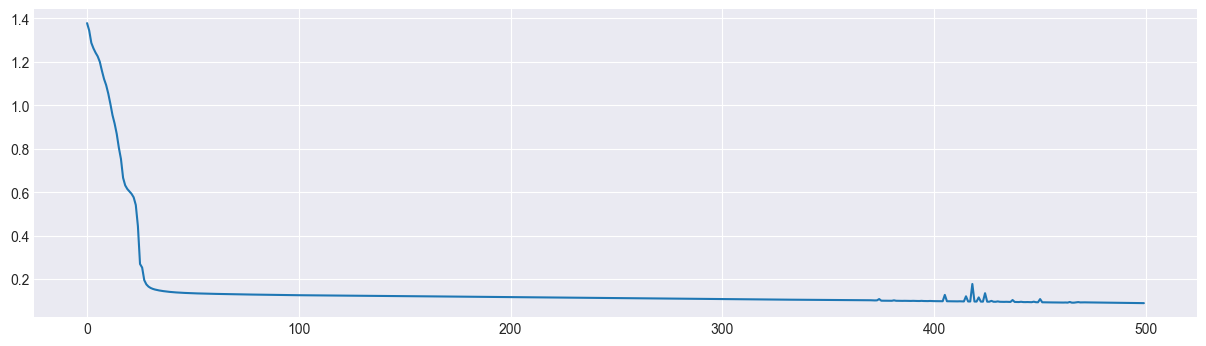

In [28]:
model = build_model(layer_params,X_train,y_train )

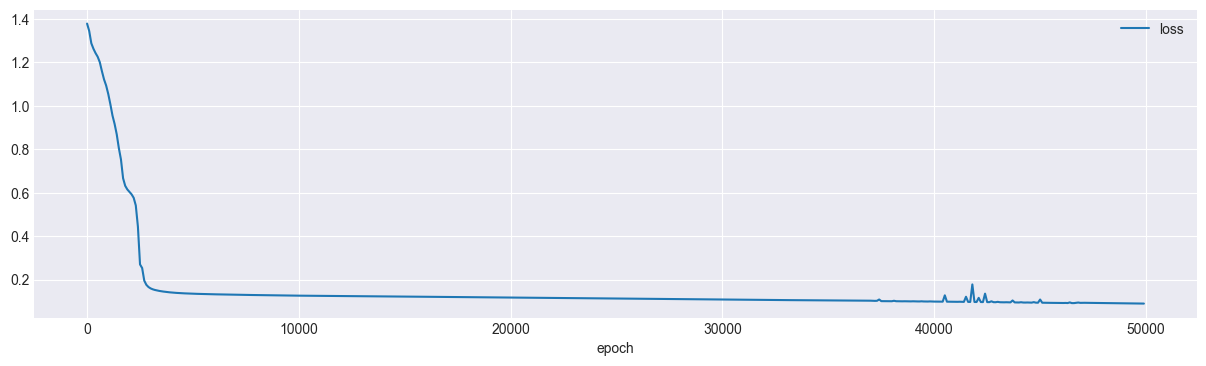

In [29]:
pd.DataFrame(loss_hist).plot(x='epoch', y='loss');

In [30]:
y_pred = predict(model, X_train)
accuracy_score(y_true = y_train.argmax(axis=1), y_pred = y_pred)


0.98375

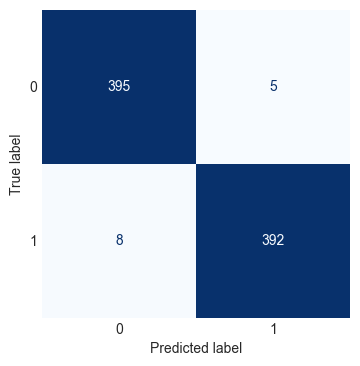

In [31]:
cm = confusion_matrix(y_true=y_train.argmax(axis=1), y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [32]:
y_pred = predict(model, X_test)
accuracy_score(y_true = y_test.argmax(axis=1), y_pred = y_pred)


0.97

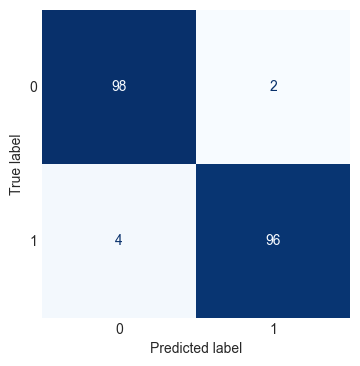

In [33]:
cm = confusion_matrix(y_true=y_test.argmax(axis=1), y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [34]:
def fn_plot_decision_boundary(model, X_tr, y_tr, X_ts, y_ts):
    fig, ax = plt.subplots(figsize =(8,5))
    dm = 0.05
    # Min and Max Along Two Axis 
    x_min, x_max = X_tr[:,0].min(), X_tr[:,0].max()
    y_min, y_max = X_tr[:,1].min(), X_tr[:,1].max()

    display(x_min, x_max)
    display(y_min, y_max)

    ## generate a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm))
    display(xx.shape,yy.shape)
    # ravel means 2d -> 1d
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    display(XX.shape)
    
    y_pred = predict(model,XX)
    display(y_pred.shape)
    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
    ax.scatter(X_tr[:,0], X_tr[:,1], c = y_tr.argmax(axis=1), edgecolors = 'k', cmap=CMAP)
    ax.scatter(X_ts[:,0], X_ts[:,1], c = y_ts.argmax(axis=1), edgecolors = 'k', cmap=CMAP, marker ='*')


-1.378885830219975

2.4191131281804545

-0.9552798292438568

1.612074679411329

(52, 76)

(52, 76)

(3952, 2)

(3952,)

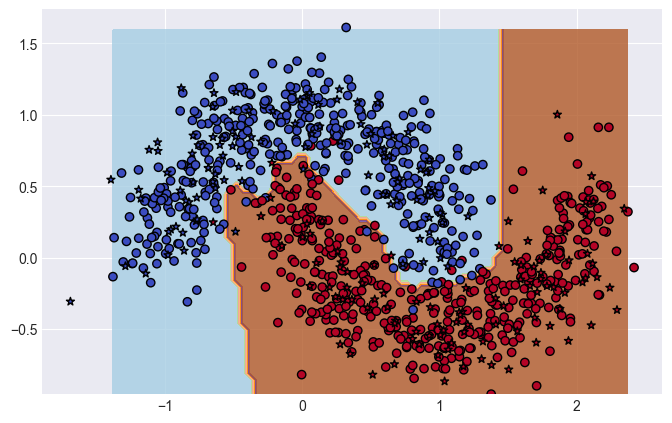

In [35]:
fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test)